# Time Slice
a.stein 4.14.2023

I want to select out the 2015 and 2005 PNW droughts as well as the 2002 California drought

In [1]:
import xarray as xr
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../')
import ndrought.drought_network_v12 as dnet
import ndrought.wrangle_v11 as dnw

/pool0/data/steinjao/drought/drought_impact/notebooks/explore/drought_track/../../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Load Data

In [2]:
paired_ds = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/paired_ds/usdm_spi_paired.nc')

In [3]:
usdm_d1_dnet = dnet.DroughtNetwork.unpickle('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/USDM_net_f25k_d1_rt20p_paired.pickle')

In [4]:
usdm_d2_dnet = dnet.DroughtNetwork.unpickle('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/USDM_net_f25k_d2_rt20p_paired.pickle')

In [5]:
spi30_d1_dnet = dnet.DroughtNetwork.unpickle('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/spi_30d_net_f25k_d1_rt20p_paired.pickle')

In [6]:
spi30_d2_dnet = dnet.DroughtNetwork.unpickle('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/spi_30d_net_f25k_d2_rt20p_paired.pickle')

In [7]:
spi180_d1_dnet = dnet.DroughtNetwork.unpickle('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/spi_180d_net_f25k_d1_rt20p_paired.pickle')

In [8]:
spi180_d2_dnet = dnet.DroughtNetwork.unpickle('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/spi_180d_net_f25k_d2_rt20p_paired.pickle')

## PNW 2015 Drought (Fall 2014 - Fall 2016)

In [9]:
times_2015 = paired_ds['USDM Date'].sel(index=slice(765,870)).values

### USDM

In [10]:
usdm_d1_2015_array = usdm_d1_dnet.to_array(start_time=765, end_time=870)

In [11]:
usdm_d2_2015_array = usdm_d2_dnet.to_array(start_time=765, end_time=870)

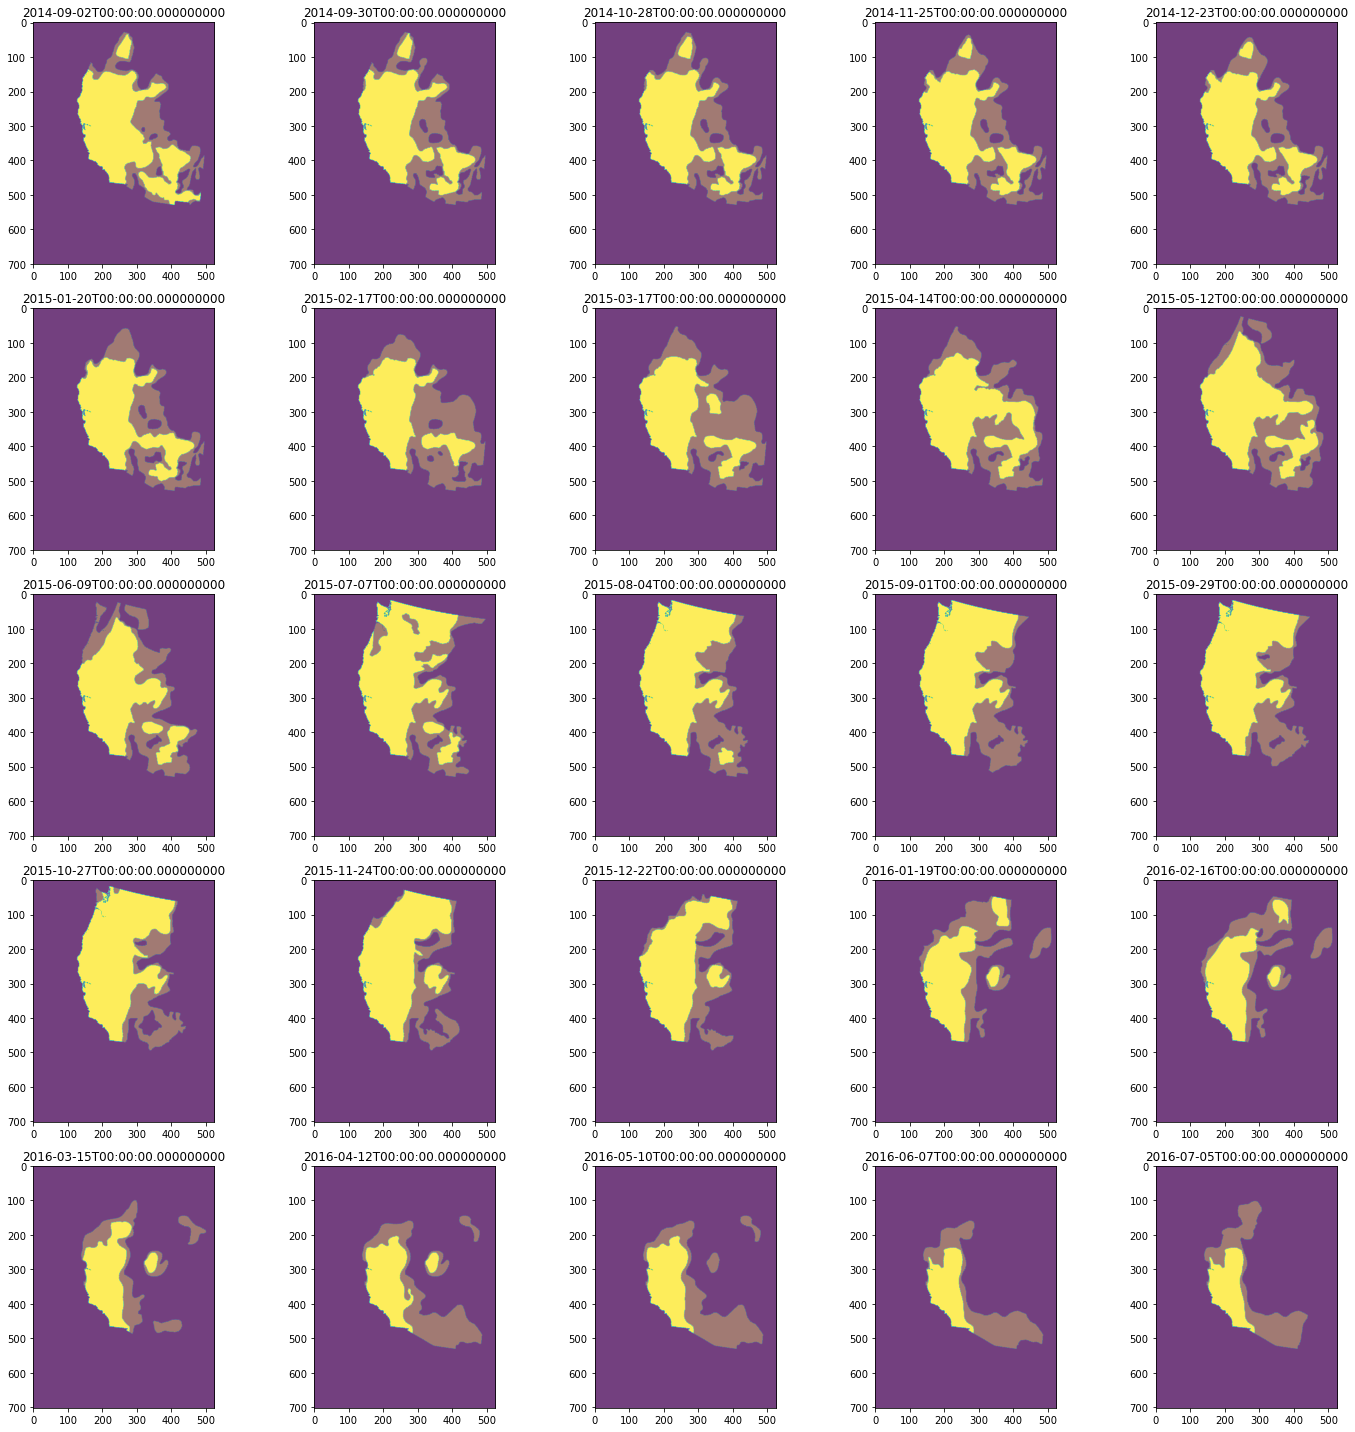

In [12]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(usdm_d1_2015_array[i*4,:,:], alpha=0.5)
    ax.imshow(usdm_d2_2015_array[i*4,:,:], alpha=0.5)
    ax.set_title(times_2015[i*4])

plt.tight_layout()

### SPI 30d

In [13]:
spi30_d1_2015_array = spi30_d1_dnet.to_array(start_time=765, end_time=870)

In [14]:
spi30_d2_2015_array = spi30_d2_dnet.to_array(start_time=765, end_time=870)

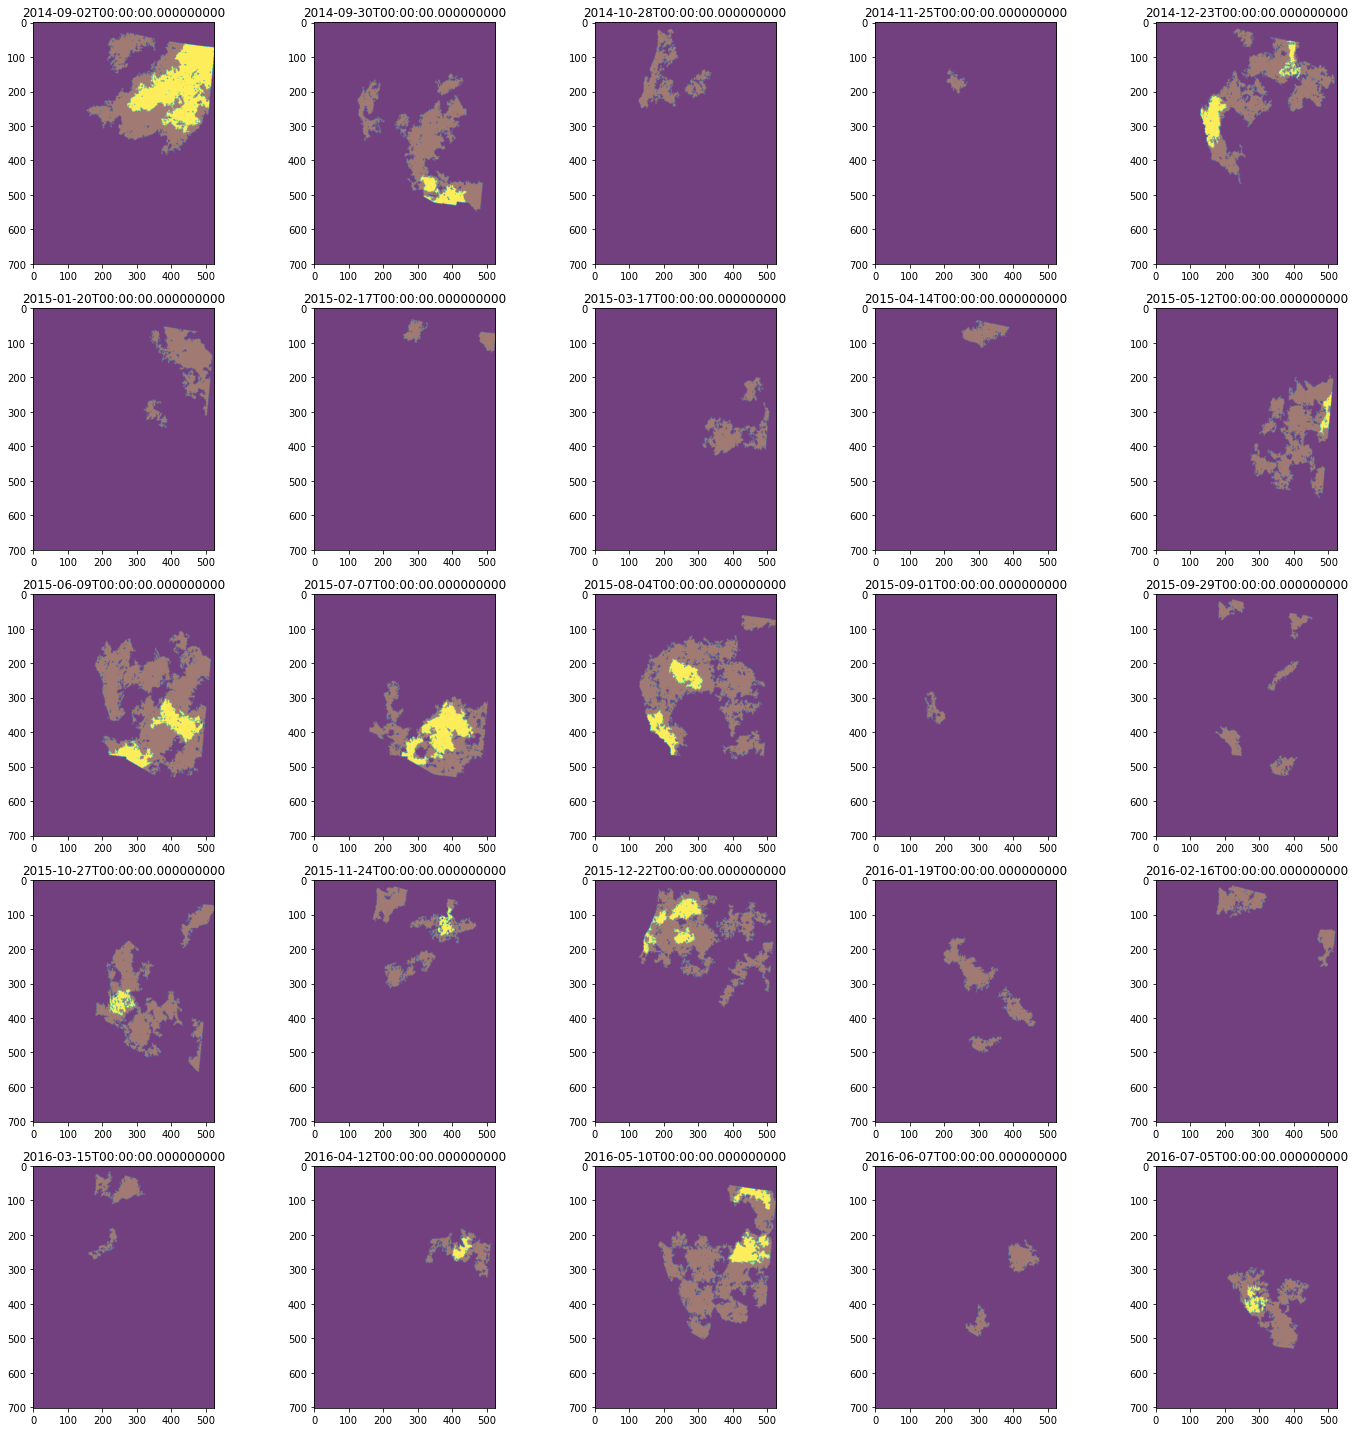

In [15]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(spi30_d1_2015_array[i*4,:,:], alpha=0.5)
    ax.imshow(spi30_d2_2015_array[i*4,:,:], alpha=0.5)
    ax.set_title(times_2015[i*4])

plt.tight_layout()

### SPI 180d

In [16]:
spi180_d1_2015_array = spi180_d1_dnet.to_array(start_time=765, end_time=870)

In [17]:
#spi180_d2_2015_array = spi180_d2_dnet.to_array(start_time=765, end_time=870)

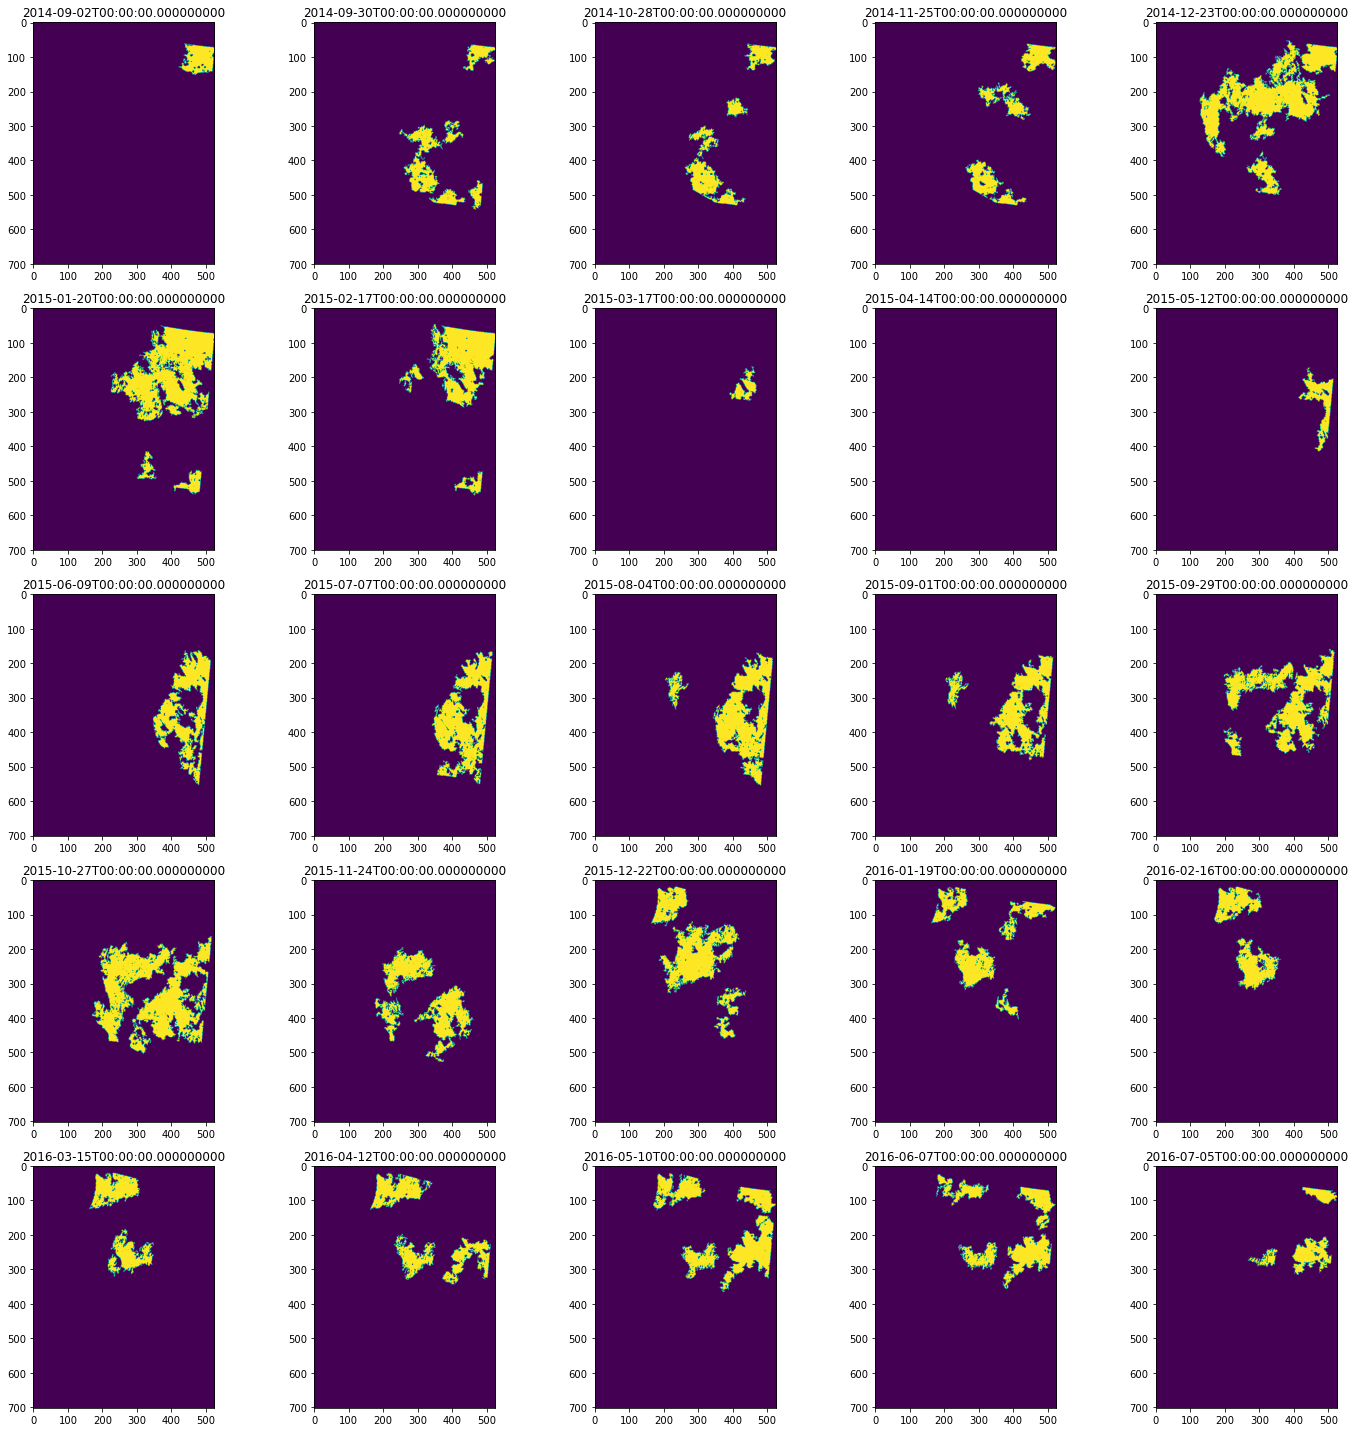

In [18]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(spi180_d1_2015_array[i*4,:,:])#, alpha=0.5)
    #ax.imshow(spi180_d2_2015_array[i*4,:,:], alpha=0.5)
    ax.set_title(times_2015[i*4])

plt.tight_layout()

### USDM & SPI

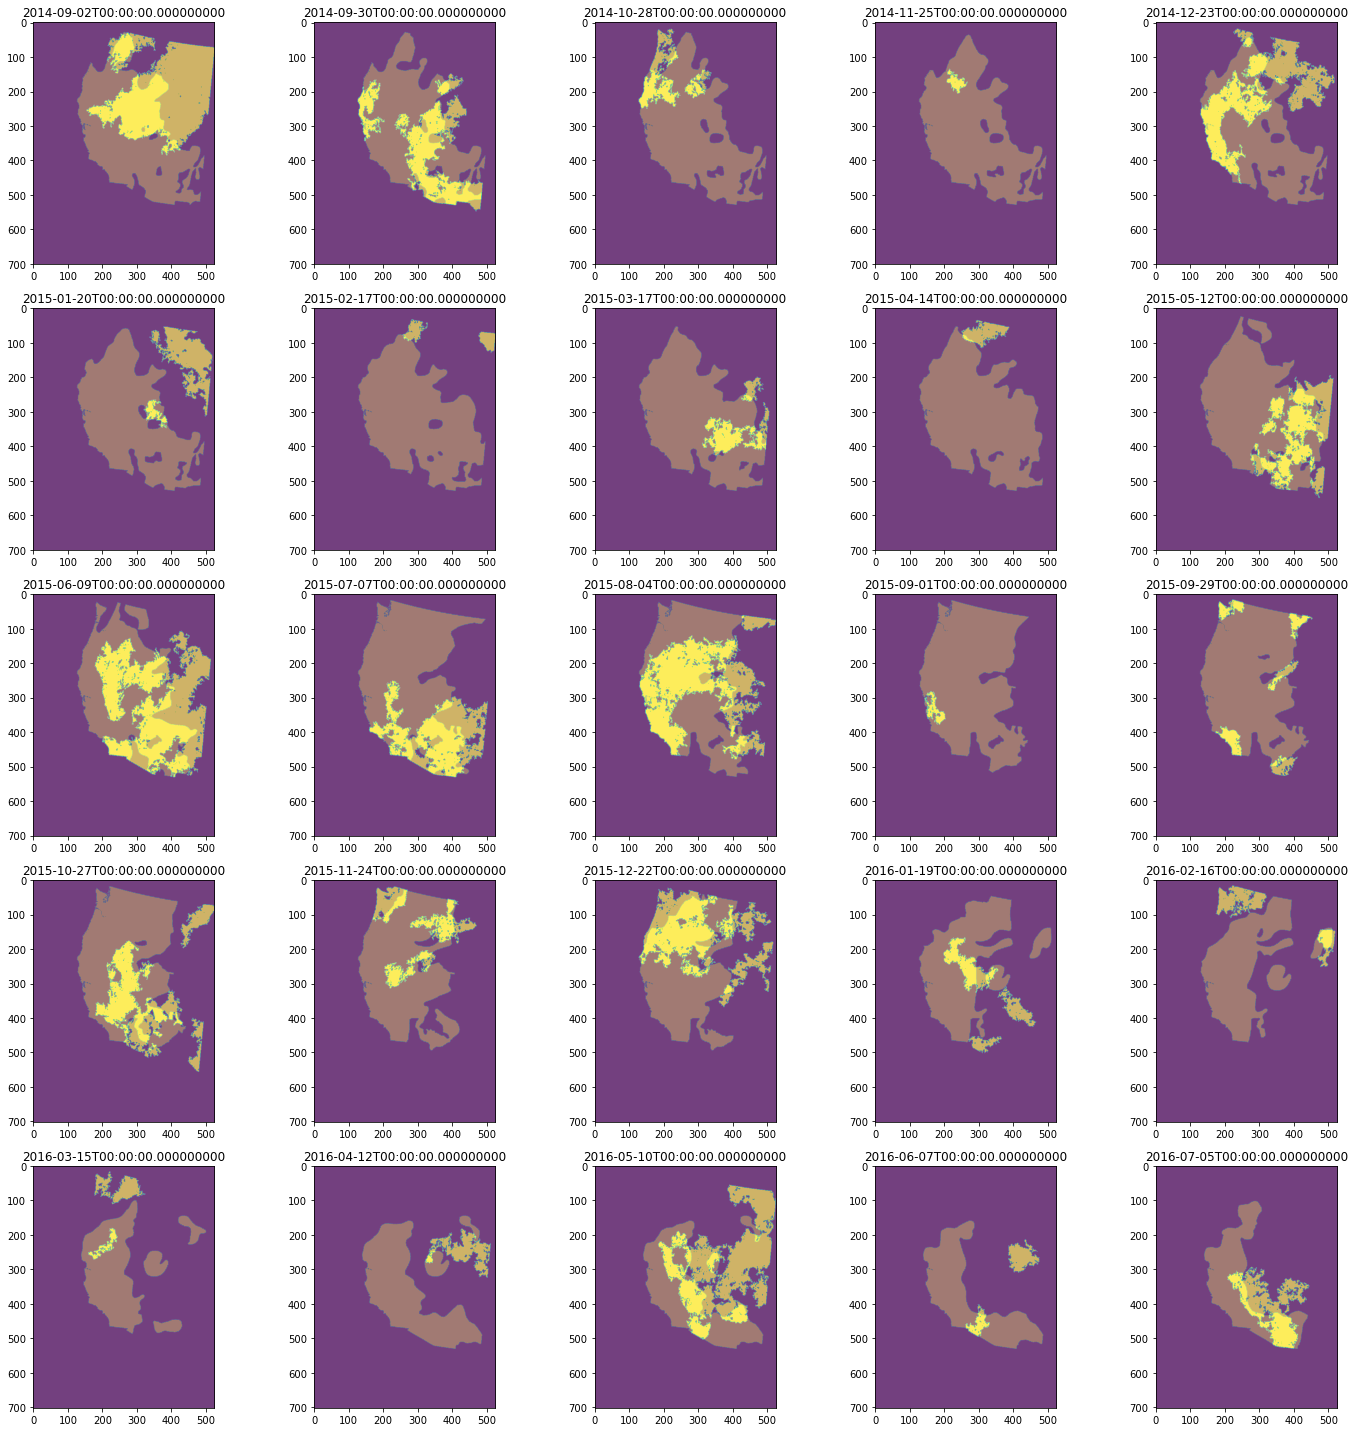

In [19]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(usdm_d1_2015_array[i*4,:,:], alpha=0.5)
    ax.imshow(spi30_d1_2015_array[i*4,:,:], alpha=0.5)
    ax.set_title(times_2015[i*4])

plt.tight_layout()

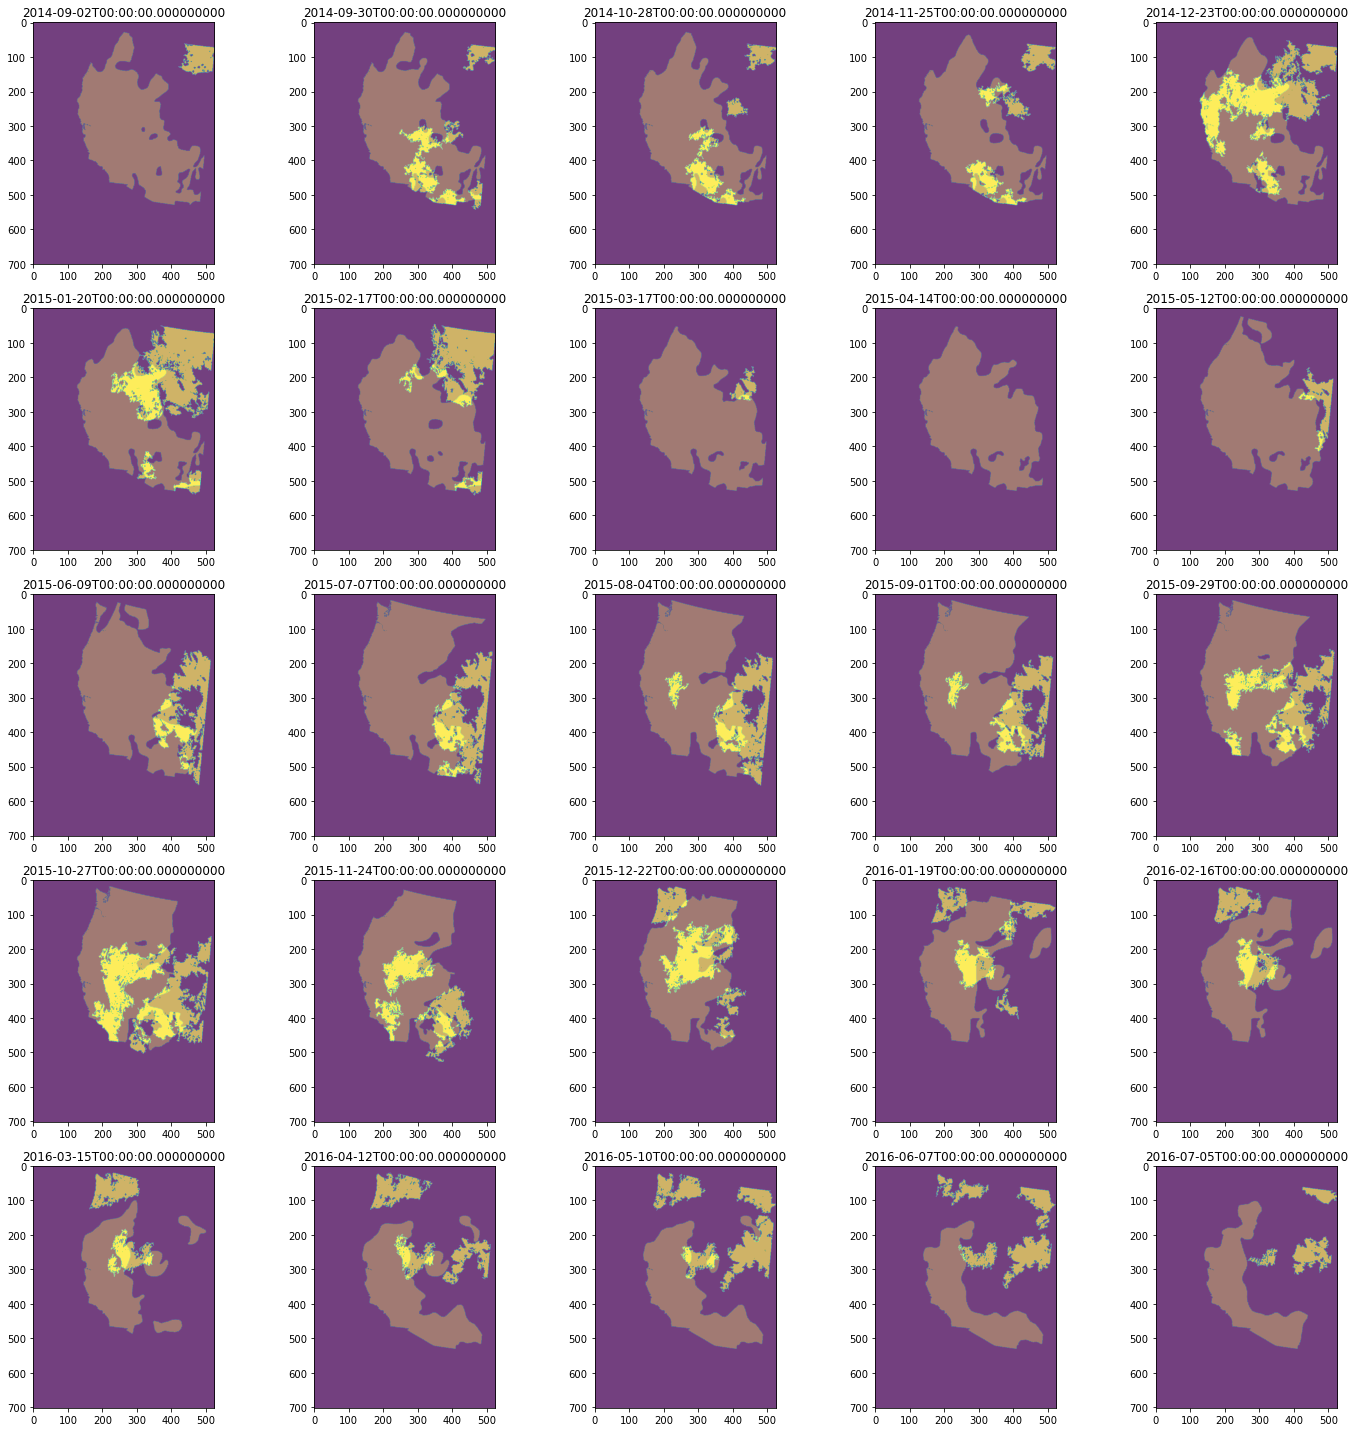

In [20]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(usdm_d1_2015_array[i*4,:,:], alpha=0.5)
    ax.imshow(spi180_d1_2015_array[i*4,:,:], alpha=0.5)
    ax.set_title(times_2015[i*4])

plt.tight_layout()

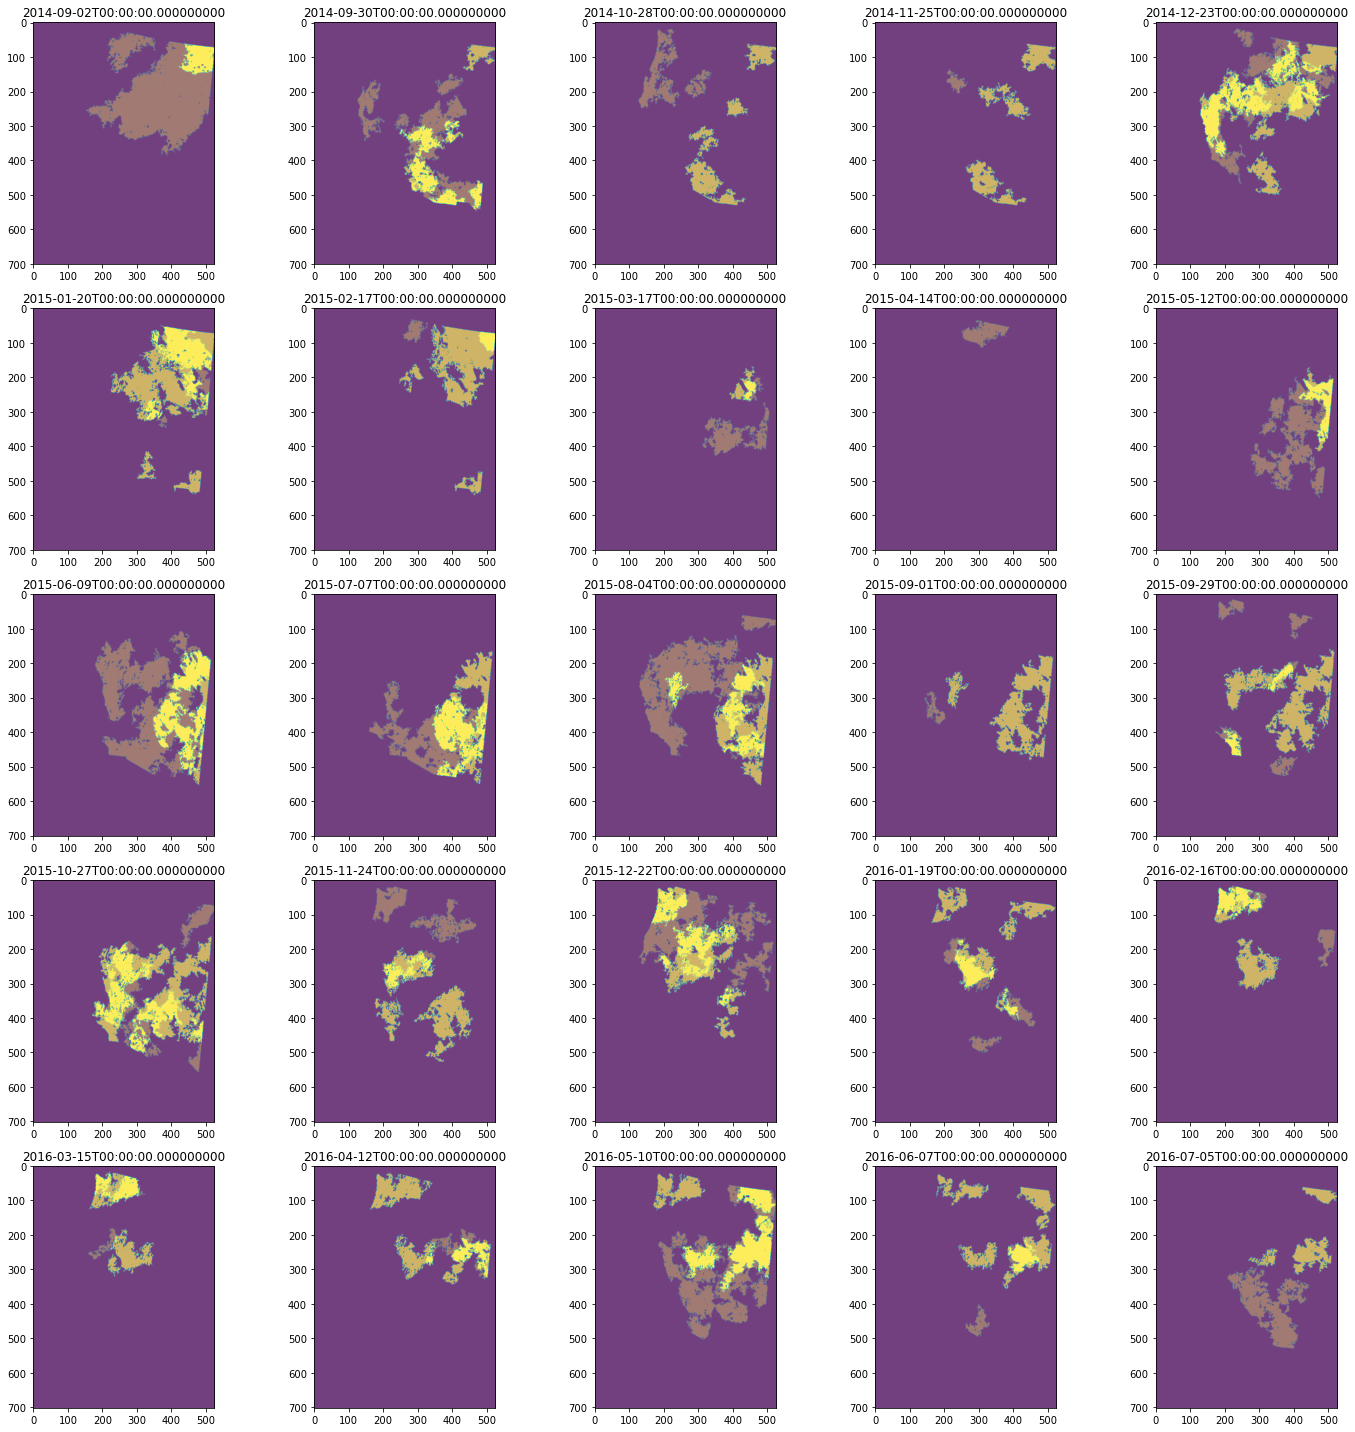

In [21]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(spi30_d1_2015_array[i*4,:,:], alpha=0.5)
    ax.imshow(spi180_d1_2015_array[i*4,:,:], alpha=0.5)
    ax.set_title(times_2015[i*4])

plt.tight_layout()

In [22]:
usdm_spi30d_d1_sum = usdm_d1_2015_array+spi30_d1_2015_array

In [23]:
aa_usdm_spi30d = (usdm_spi30d_d1_sum == 2).sum(axis=(1,2))

In [24]:
area_scalar = 18.1 # km2

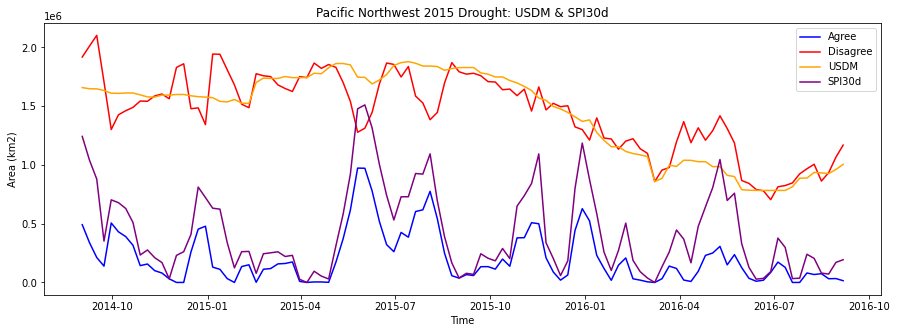

In [25]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(times_2015, aa_usdm_spi30d*area_scalar, color='blue', label='Agree')
ax.plot(times_2015, (usdm_spi30d_d1_sum == 1).sum(axis=(1,2))*area_scalar, color='r', label='Disagree')
ax.plot(times_2015, usdm_d1_2015_array.sum(axis=(1,2))*area_scalar, color='orange', label='USDM')
ax.plot(times_2015, spi30_d1_2015_array.sum(axis=(1,2))*area_scalar, color='purple', label='SPI30d')

ax.set_ylabel('Area (km2)')
ax.set_xlabel('Time')
ax.set_title('Pacific Northwest 2015 Drought: USDM & SPI30d')
ax.legend()
fig.set_facecolor('w')

In [28]:
aa_usdm_spi180d = (usdm_d1_2015_array+spi180_d1_2015_array == 2).sum(axis=(1,2))

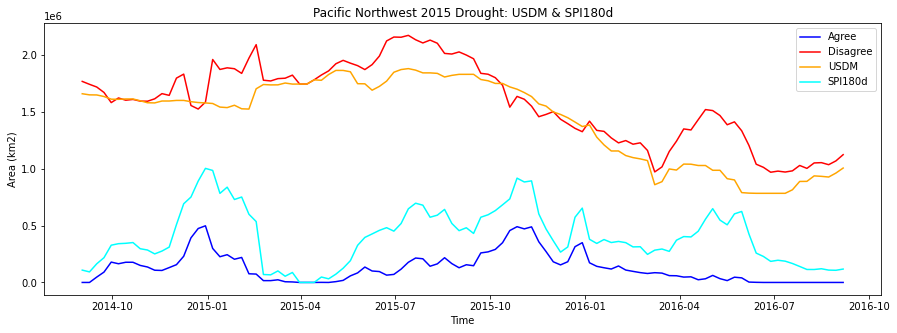

In [30]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(times_2015, aa_usdm_spi180d*area_scalar, color='blue', label='Agree')
ax.plot(times_2015, (usdm_d1_2015_array+spi180_d1_2015_array == 1).sum(axis=(1,2))*area_scalar, color='r', label='Disagree')
ax.plot(times_2015, usdm_d1_2015_array.sum(axis=(1,2))*area_scalar, color='orange', label='USDM')
ax.plot(times_2015, spi180_d1_2015_array.sum(axis=(1,2))*area_scalar, color='cyan', label='SPI180d')

ax.set_ylabel('Area (km2)')
ax.set_xlabel('Time')
ax.set_title('Pacific Northwest 2015 Drought: USDM & SPI180d')
ax.legend()
fig.set_facecolor('w')

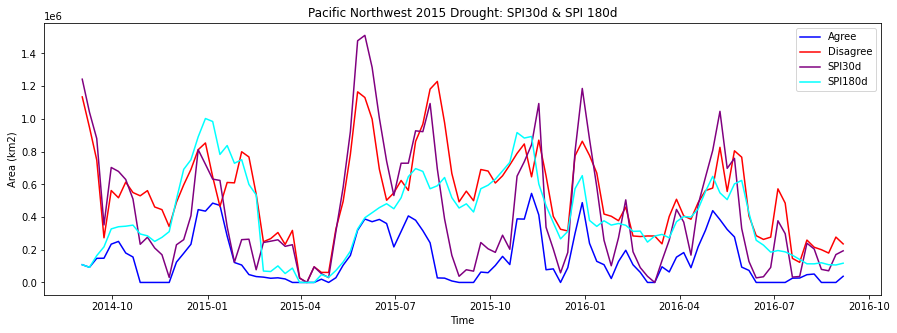

In [31]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(times_2015, (spi30_d1_2015_array+spi180_d1_2015_array == 2).sum(axis=(1,2))*area_scalar, color='blue', label='Agree')
ax.plot(times_2015, (spi30_d1_2015_array+spi180_d1_2015_array == 1).sum(axis=(1,2))*area_scalar, color='r', label='Disagree')
ax.plot(times_2015, spi30_d1_2015_array.sum(axis=(1,2))*area_scalar, color='purple', label='SPI30d')
ax.plot(times_2015, spi180_d1_2015_array.sum(axis=(1,2))*area_scalar, color='cyan', label='SPI180d')

ax.set_ylabel('Area (km2)')
ax.set_xlabel('Time')
ax.set_title('Pacific Northwest 2015 Drought: SPI30d & SPI 180d')
ax.legend()
fig.set_facecolor('w')

## Pacific Northwest 2005 Drought

In [32]:
times_2005 = paired_ds['USDM Date'].sel(index=slice(244,348)).values
print(times_2005[0], times_2005[-1])

2004-09-07T00:00:00.000000000 2006-09-05T00:00:00.000000000


### Get Arrays

In [33]:
usdm_d1_2005_array = usdm_d1_dnet.to_array(start_time=244, end_time=348)

In [34]:
spi30d_d1_2005_array = spi30_d1_dnet.to_array(start_time=244, end_time=348)

In [35]:
spi180d_d1_2005_array = spi180_d1_dnet.to_array(start_time=244, end_time=348)

In [36]:
usdm_d1_2005_array.shape

(105, 702, 525)

### Make Plots

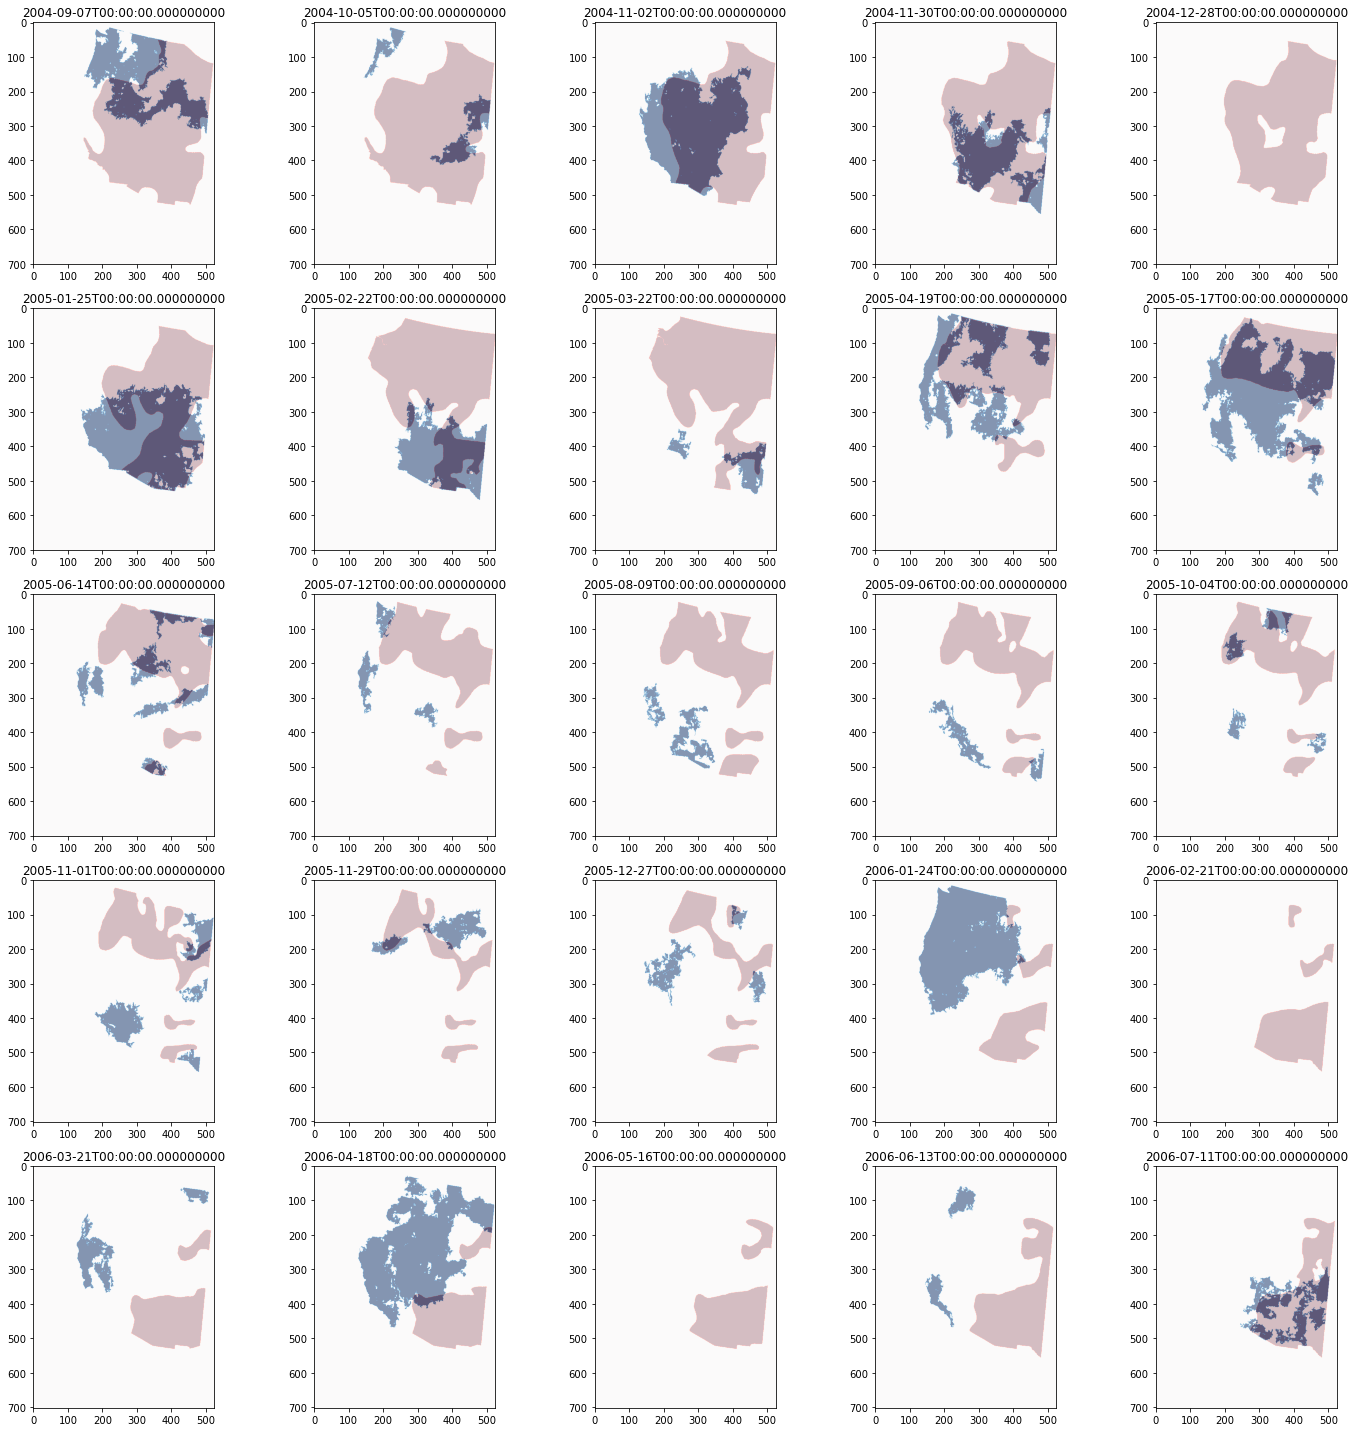

In [37]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(usdm_d1_2005_array[i*4,:,:], alpha=0.5, cmap='Reds')
    ax.imshow(spi30d_d1_2005_array[i*4,:,:], alpha=0.5,cmap='Blues')
    ax.set_title(times_2005[i*4])

plt.tight_layout()

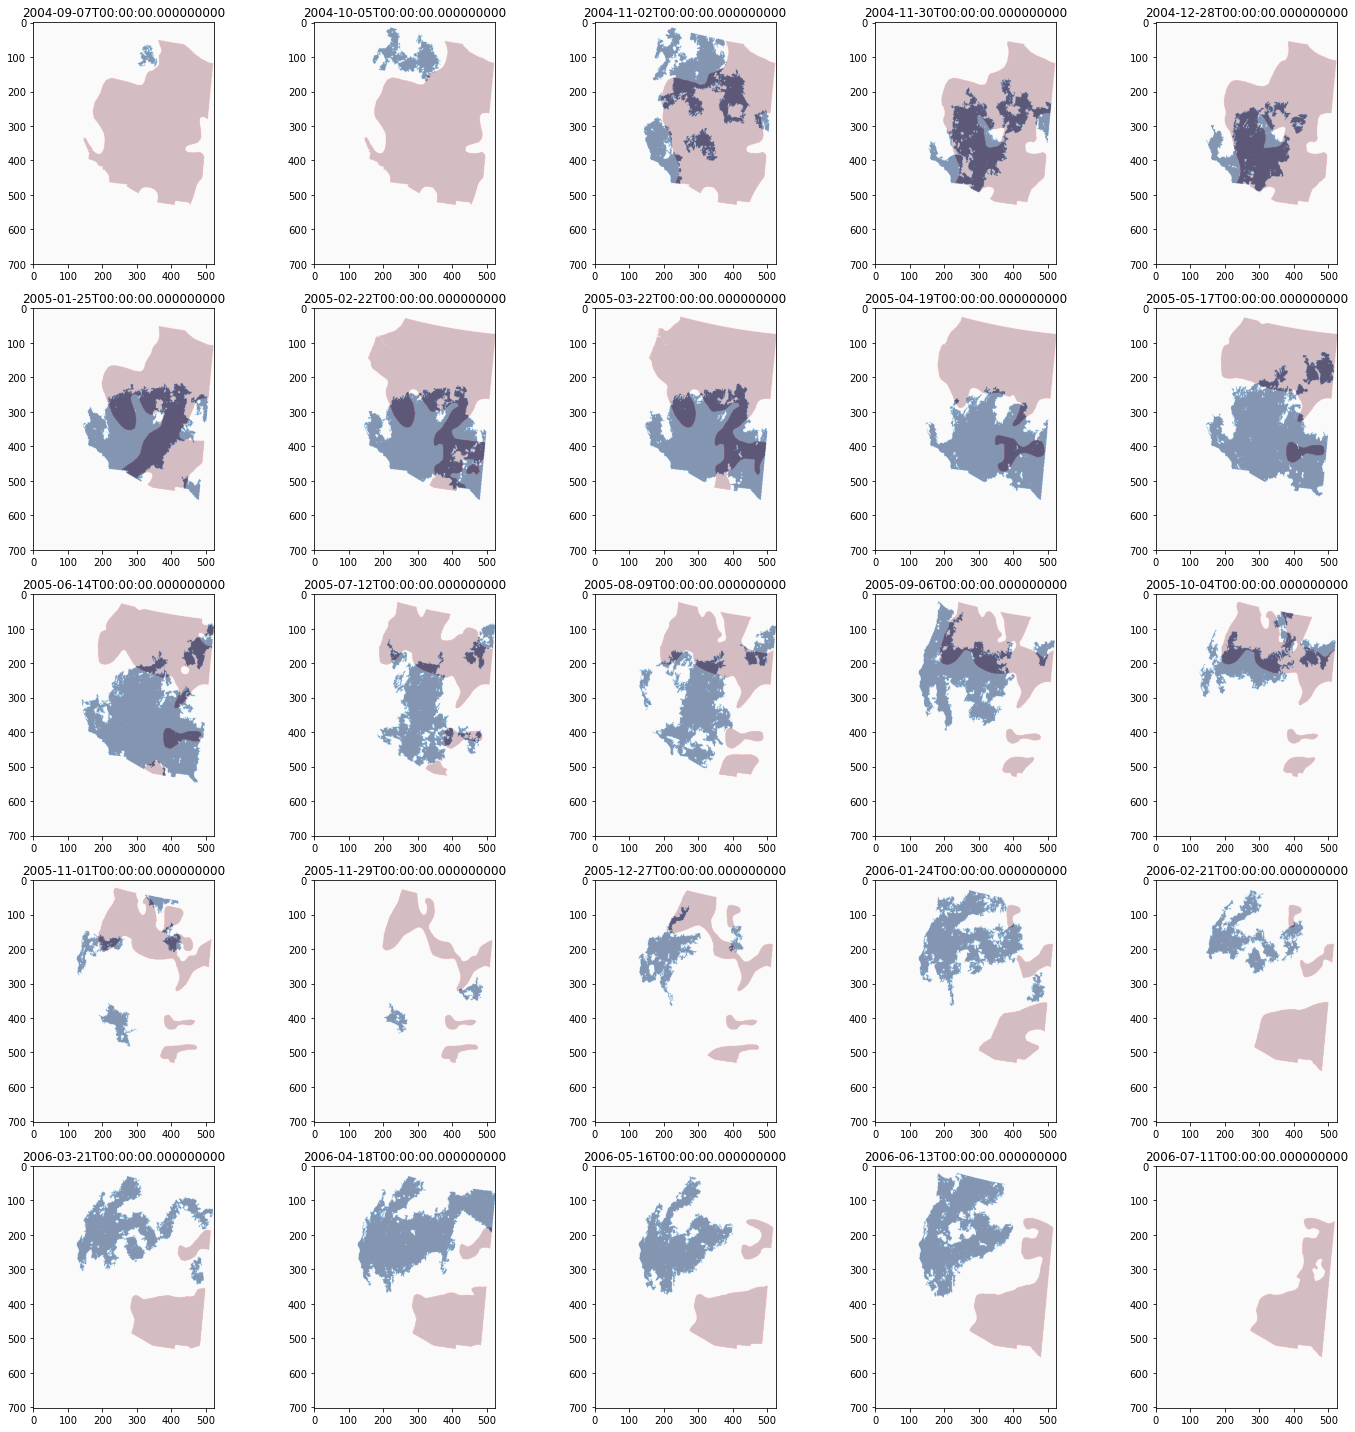

In [38]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(usdm_d1_2005_array[i*4,:,:], alpha=0.5, cmap='Reds')
    ax.imshow(spi180d_d1_2005_array[i*4,:,:], alpha=0.5,cmap='Blues')
    ax.set_title(times_2005[i*4])

plt.tight_layout()

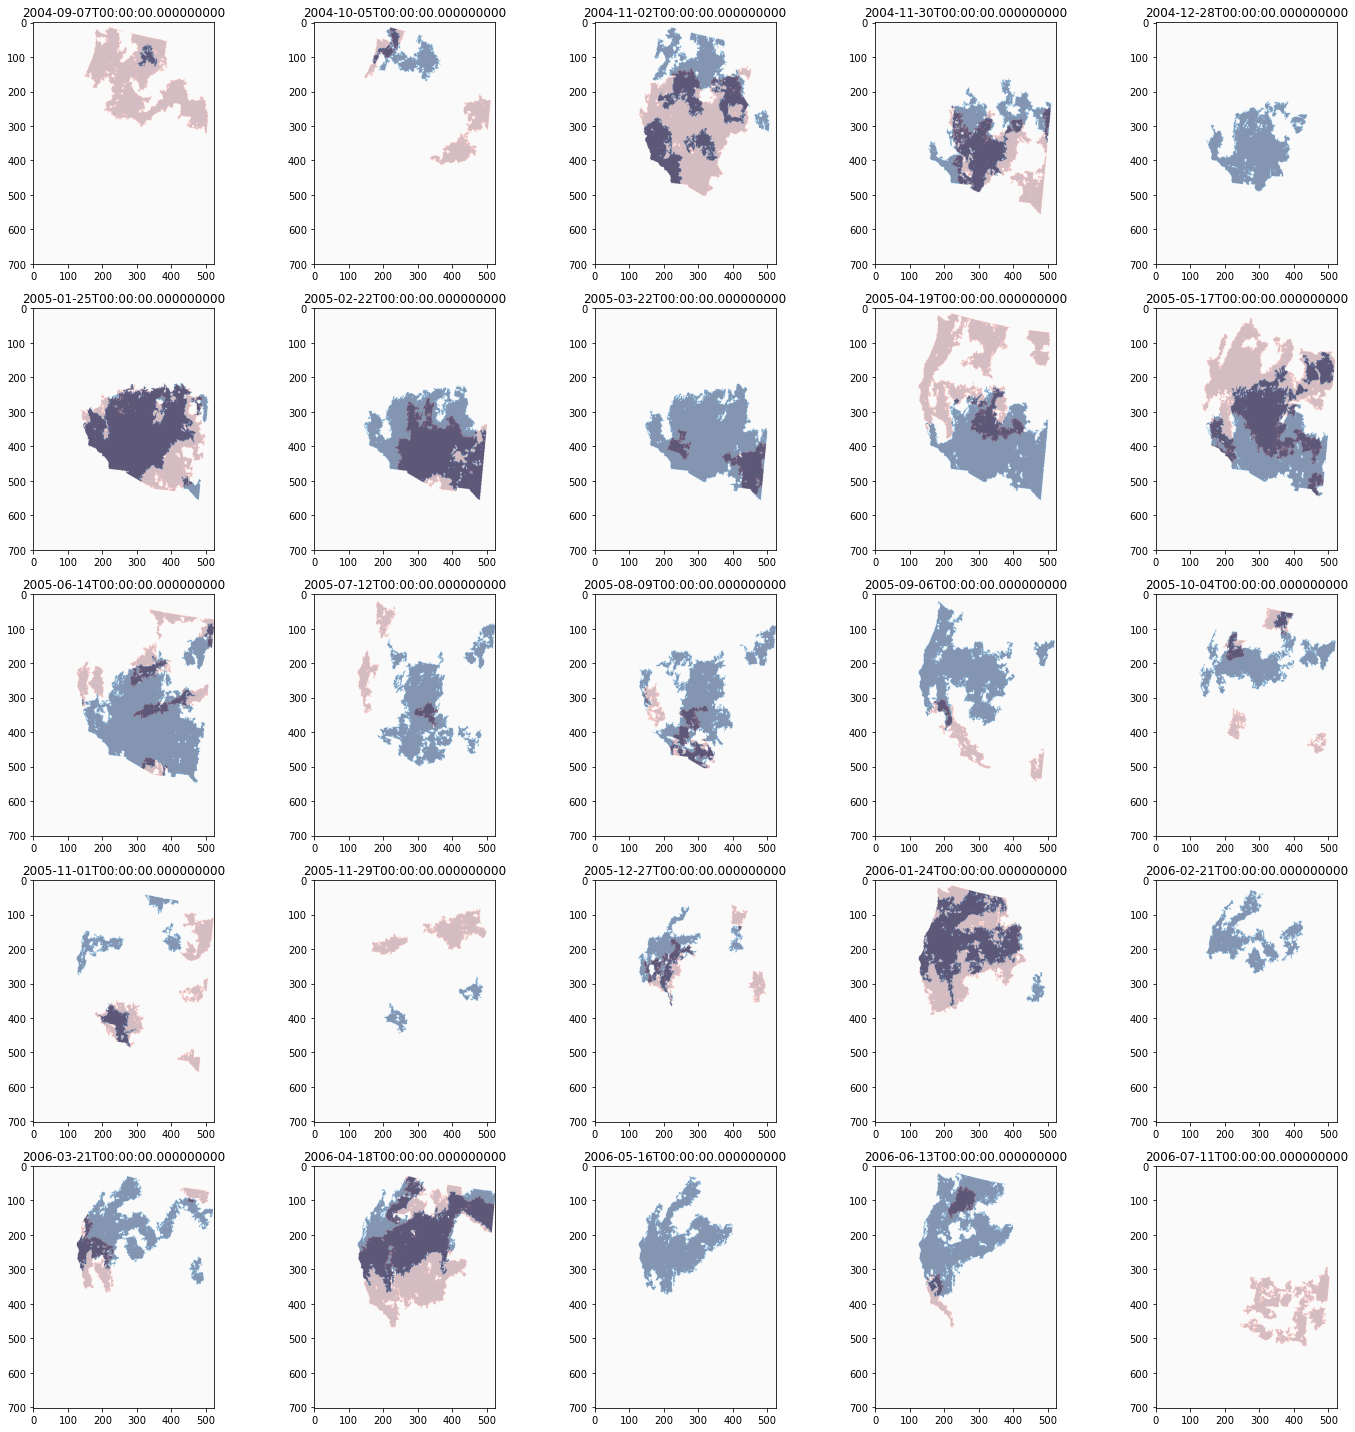

In [39]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(spi30d_d1_2005_array[i*4,:,:], alpha=0.5, cmap='Reds')
    ax.imshow(spi180d_d1_2005_array[i*4,:,:], alpha=0.5,cmap='Blues')
    ax.set_title(times_2005[i*4])

plt.tight_layout()

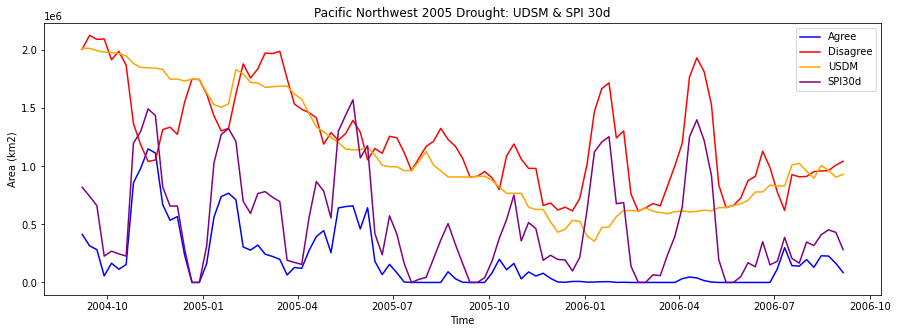

In [40]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(times_2005, (usdm_d1_2005_array+spi30d_d1_2005_array == 2).sum(axis=(1,2))*area_scalar, color='blue', label='Agree')
ax.plot(times_2005, (usdm_d1_2005_array+spi30d_d1_2005_array == 1).sum(axis=(1,2))*area_scalar, color='r', label='Disagree')
ax.plot(times_2005, usdm_d1_2005_array.sum(axis=(1,2))*area_scalar, color='orange', label='USDM')
ax.plot(times_2005, spi30d_d1_2005_array.sum(axis=(1,2))*area_scalar, color='purple', label='SPI30d')

ax.set_ylabel('Area (km2)')
ax.set_xlabel('Time')
ax.set_title('Pacific Northwest 2005 Drought: UDSM & SPI 30d')
ax.legend()
fig.set_facecolor('w')

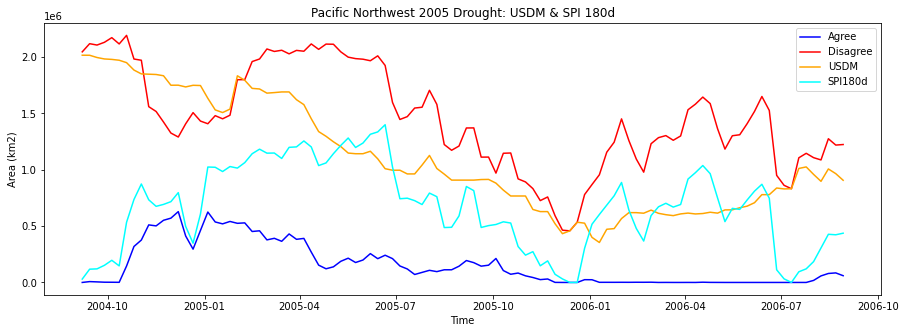

In [41]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(times_2005[:-1], (usdm_d1_2005_array[:-1]+spi180d_d1_2005_array == 2).sum(axis=(1,2))*area_scalar, color='blue', label='Agree')
ax.plot(times_2005[:-1], (usdm_d1_2005_array[:-1]+spi180d_d1_2005_array == 1).sum(axis=(1,2))*area_scalar, color='r', label='Disagree')
ax.plot(times_2005[:-1], usdm_d1_2005_array[:-1].sum(axis=(1,2))*area_scalar, color='orange', label='USDM')
ax.plot(times_2005[:-1], spi180d_d1_2005_array.sum(axis=(1,2))*area_scalar, color='cyan', label='SPI180d')

ax.set_ylabel('Area (km2)')
ax.set_xlabel('Time')
ax.set_title('Pacific Northwest 2005 Drought: USDM & SPI 180d')
ax.legend()
fig.set_facecolor('w')

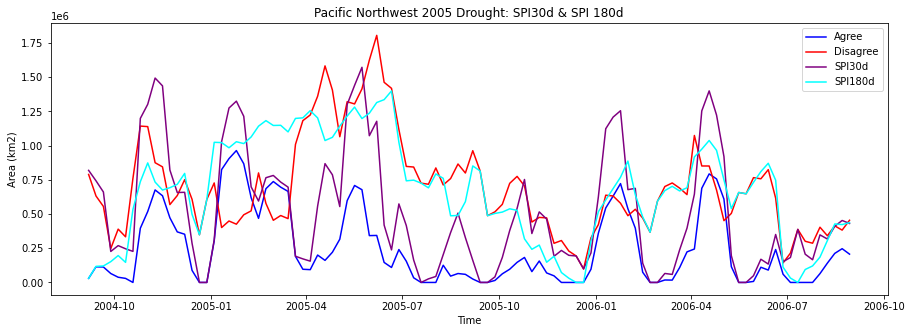

In [42]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(times_2005[:-1], (spi30d_d1_2005_array[:-1]+spi180d_d1_2005_array == 2).sum(axis=(1,2))*area_scalar, color='blue', label='Agree')
ax.plot(times_2005[:-1], (spi30d_d1_2005_array[:-1]+spi180d_d1_2005_array == 1).sum(axis=(1,2))*area_scalar, color='r', label='Disagree')
ax.plot(times_2005[:-1], spi30d_d1_2005_array[:-1].sum(axis=(1,2))*area_scalar, color='purple', label='SPI30d')
ax.plot(times_2005[:-1], spi180d_d1_2005_array.sum(axis=(1,2))*area_scalar, color='cyan', label='SPI180d')

ax.set_ylabel('Area (km2)')
ax.set_xlabel('Time')
ax.set_title('Pacific Northwest 2005 Drought: SPI30d & SPI 180d')
ax.legend()
fig.set_facecolor('w')

## California 2002 Drought

In [43]:
times_2002 = paired_ds['USDM Date'].sel(index=slice(87,191)).values
print(times_2002[0], times_2002[-1])

2001-09-04T00:00:00.000000000 2003-09-02T00:00:00.000000000


### Get Arrays

In [44]:
usdm_d1_2002_array = usdm_d1_dnet.to_array(start_time=87, end_time=191)

In [45]:
spi30d_d1_2002_array = spi30_d1_dnet.to_array(start_time=87, end_time=191)

In [46]:
spi180d_d1_2002_array = spi180_d1_dnet.to_array(start_time=87, end_time=191)

In [47]:
usdm_d1_2002_array.shape

(105, 702, 525)

In [48]:
spi30d_d1_2002_array.shape

(105, 702, 525)

In [49]:
spi180d_d1_2002_array.shape

(91, 702, 525)

### Make Plots

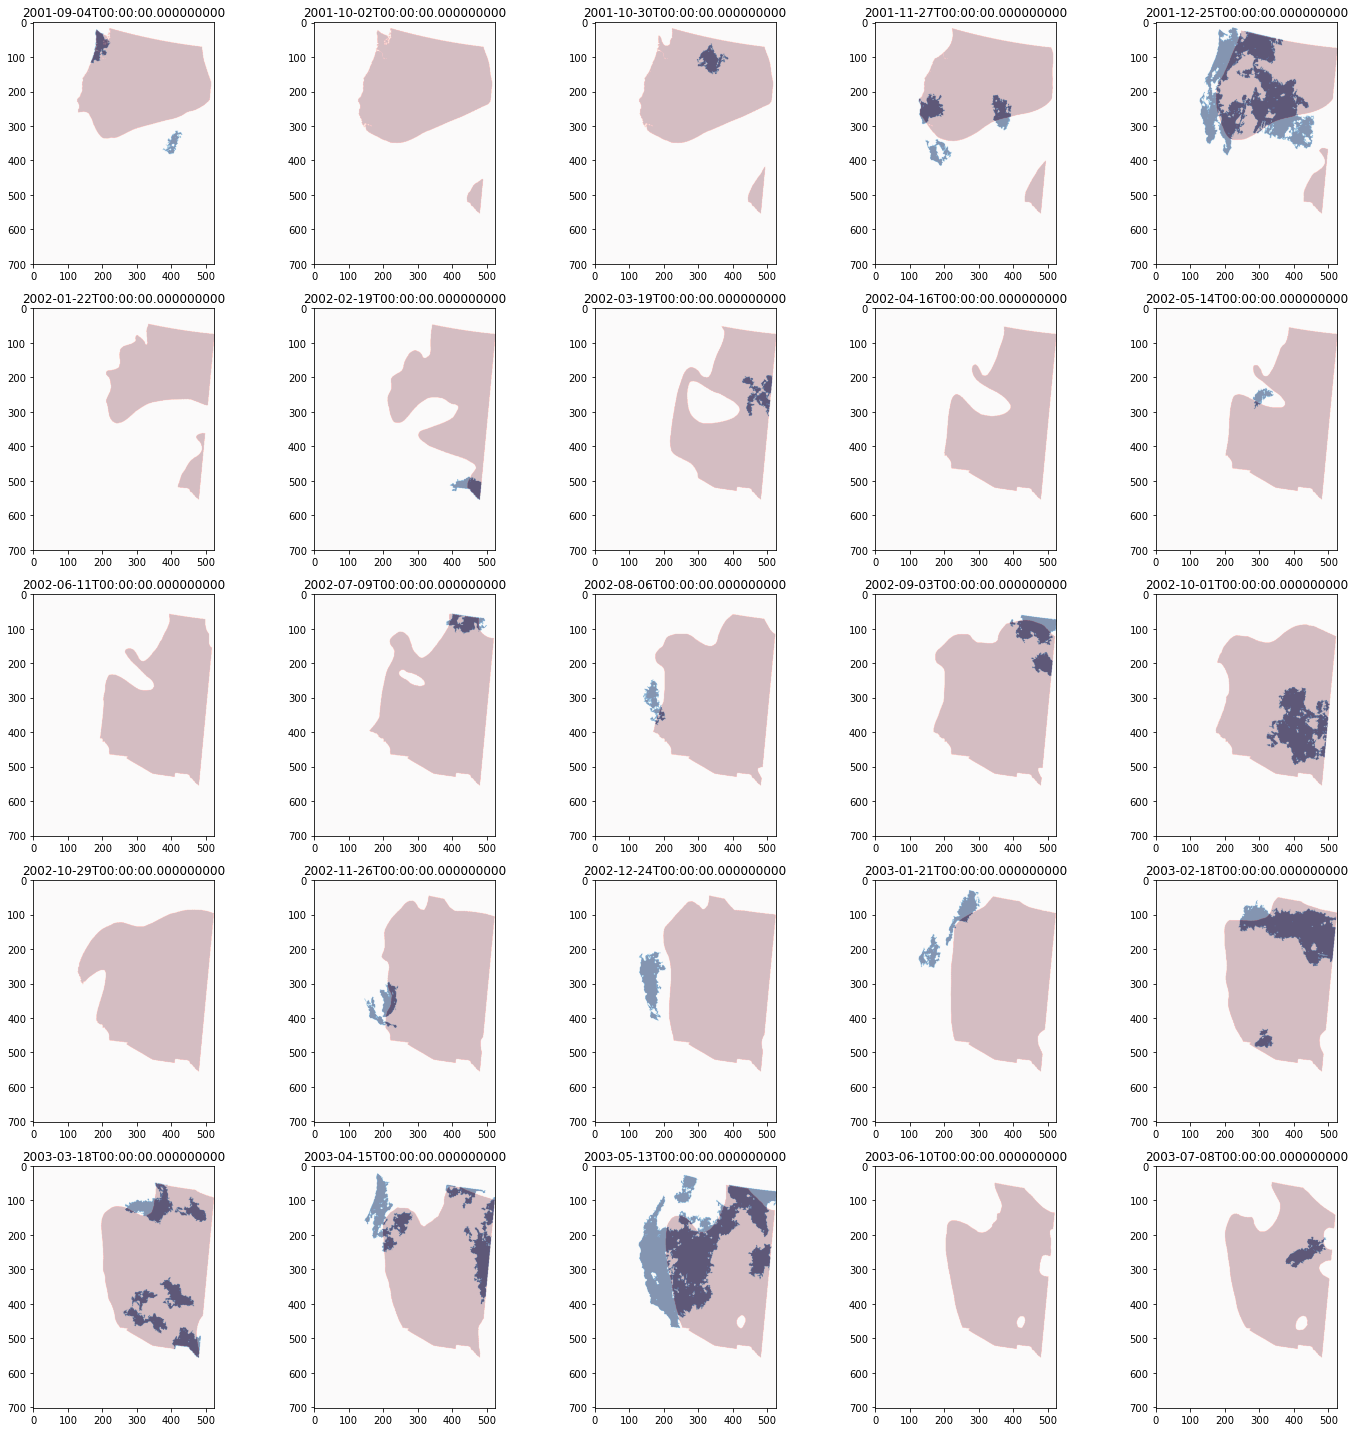

In [50]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(usdm_d1_2002_array[i*4,:,:], alpha=0.5, cmap='Reds')
    ax.imshow(spi30d_d1_2002_array[i*4,:,:], alpha=0.5,cmap='Blues')
    ax.set_title(times_2002[i*4])

plt.tight_layout()

Hm. That looks like an everywhere BUT California drought ... don't think I had that right. What if we just pull out the middle of the record since we've already done 2005 and 2015?

## 2010/2011 Drought?

In [51]:
#times_2010 = paired_ds['USDM Date'].sel(index=slice(504,609)).values
times_2011 = paired_ds['USDM Date'].sel(index=slice(557,661)).values
print(times_2011[0], times_2011[-1])

2010-09-07T00:00:00.000000000 2012-09-04T00:00:00.000000000


Going with the 2010-2012 window since there is stuff going on with SPI there and think it'd be good to have a drought that isn't only defined by USDM

In [52]:
usdm_d1_2011_array = usdm_d1_dnet.to_array(start_time=504, end_time=609)

In [53]:
usdm_d1_2011_array.shape

(106, 702, 525)

In [54]:
spi30_d1_2011_array = spi30_d1_dnet.to_array(start_time=504, end_time=609)

In [55]:
spi30_d1_2011_array.shape

(105, 702, 525)

In [56]:
spi180_d1_2011_array = spi180_d1_dnet.to_array(start_time=504, end_time=609)

In [57]:
spi180_d1_2011_array.shape

(106, 702, 525)

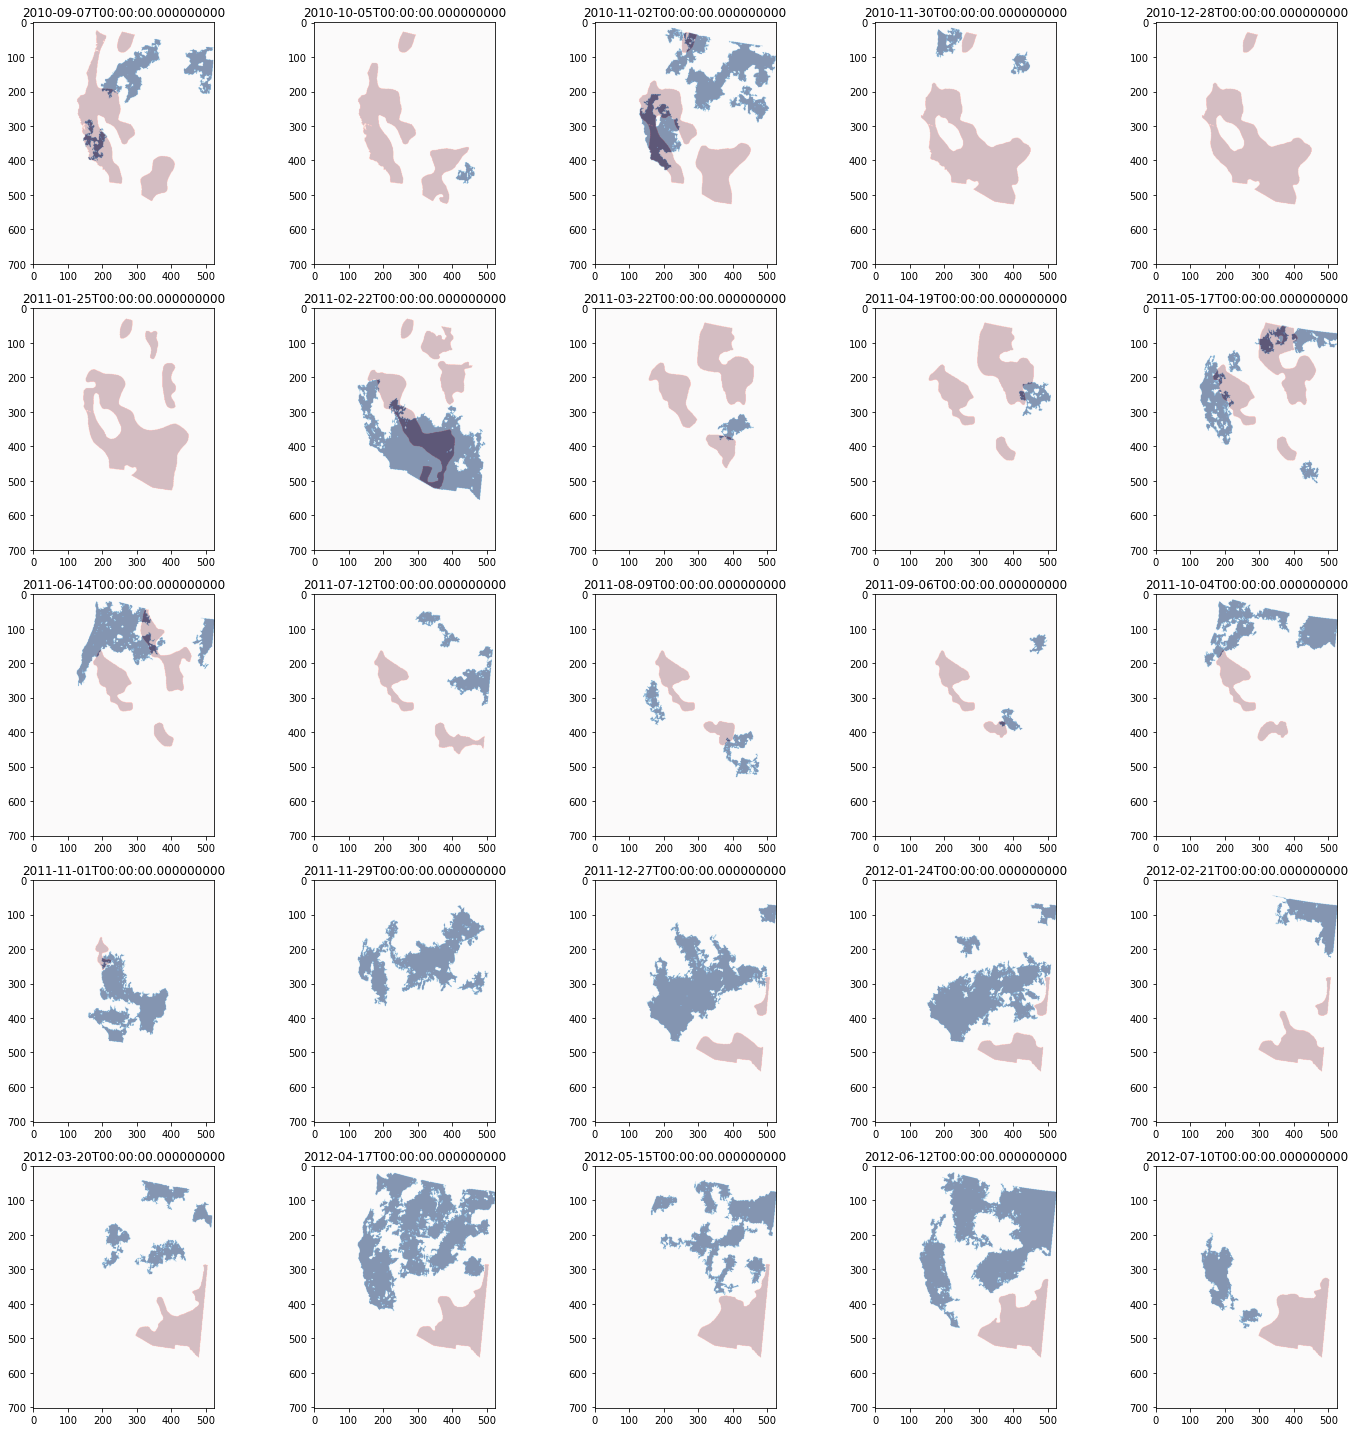

In [58]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(usdm_d1_2011_array[i*4,:,:], alpha=0.5, cmap='Reds')
    ax.imshow(spi30_d1_2011_array[i*4,:,:], alpha=0.5,cmap='Blues')
    ax.set_title(times_2011[i*4])

plt.tight_layout()

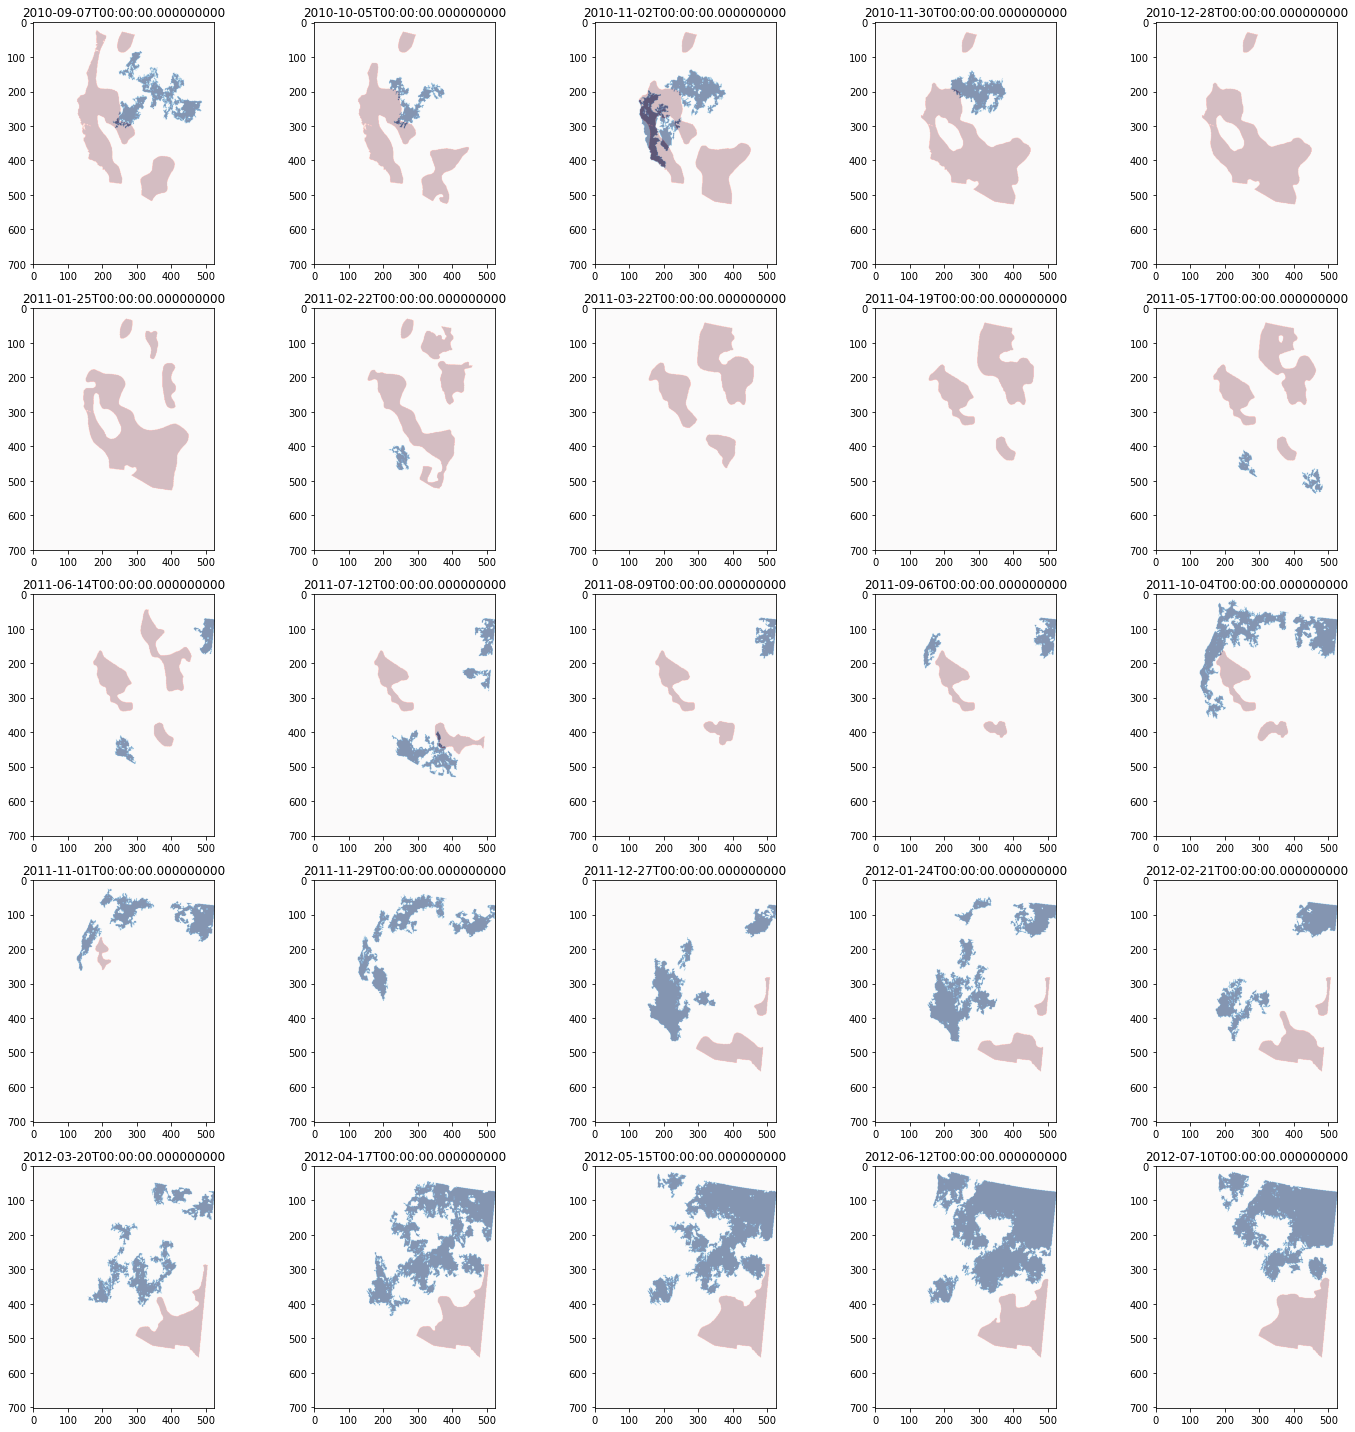

In [59]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(usdm_d1_2011_array[i*4,:,:], alpha=0.5, cmap='Reds')
    ax.imshow(spi180_d1_2011_array[i*4,:,:], alpha=0.5,cmap='Blues')
    ax.set_title(times_2011[i*4])

plt.tight_layout()

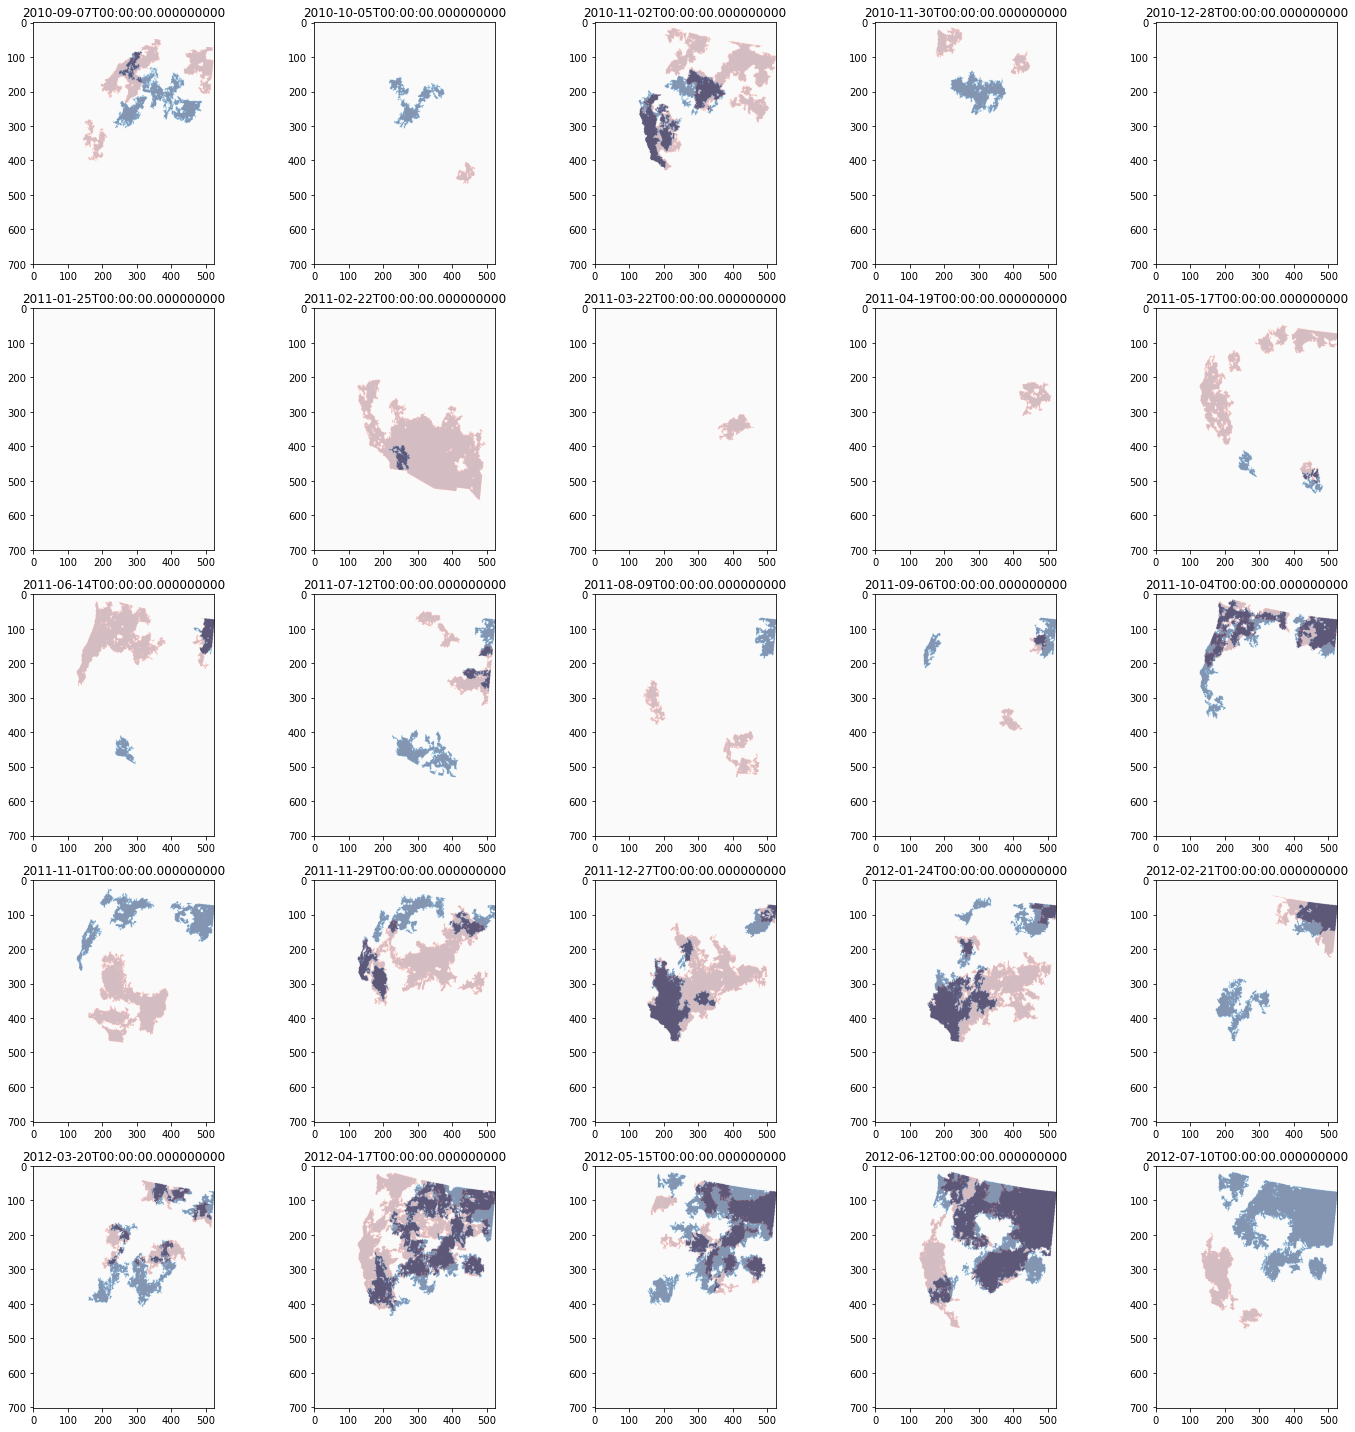

In [60]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(spi30_d1_2011_array[i*4,:,:], alpha=0.5, cmap='Reds')
    ax.imshow(spi180_d1_2011_array[i*4,:,:], alpha=0.5,cmap='Blues')
    ax.set_title(times_2011[i*4])

plt.tight_layout()

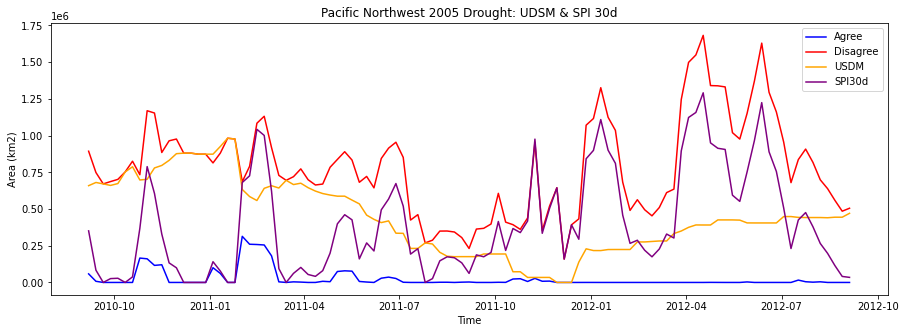

In [61]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(times_2011, (usdm_d1_2011_array[:-1]+spi30_d1_2011_array == 2).sum(axis=(1,2))*area_scalar, color='blue', label='Agree')
ax.plot(times_2011, (usdm_d1_2011_array[:-1]+spi30_d1_2011_array == 1).sum(axis=(1,2))*area_scalar, color='r', label='Disagree')
ax.plot(times_2011, usdm_d1_2011_array[:-1].sum(axis=(1,2))*area_scalar, color='orange', label='USDM')
ax.plot(times_2011, spi30_d1_2011_array.sum(axis=(1,2))*area_scalar, color='purple', label='SPI30d')

ax.set_ylabel('Area (km2)')
ax.set_xlabel('Time')
ax.set_title('Pacific Northwest 2005 Drought: UDSM & SPI 30d')
ax.legend()
fig.set_facecolor('w')

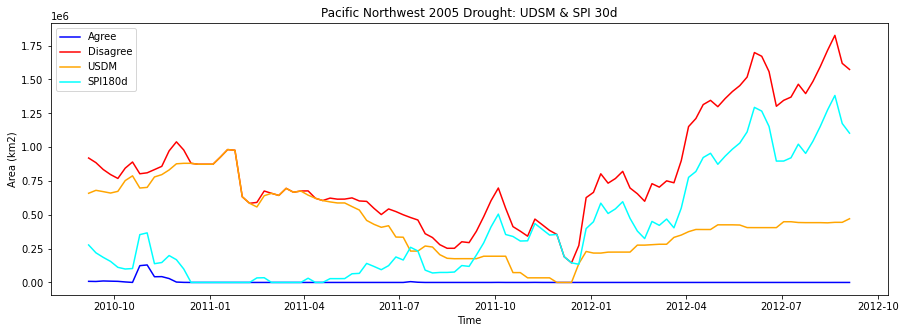

In [64]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(times_2011, (usdm_d1_2011_array[:-1]+spi180_d1_2011_array[:-1] == 2).sum(axis=(1,2))*area_scalar, color='blue', label='Agree')
ax.plot(times_2011, (usdm_d1_2011_array[:-1]+spi180_d1_2011_array[:-1] == 1).sum(axis=(1,2))*area_scalar, color='r', label='Disagree')
ax.plot(times_2011, usdm_d1_2011_array[:-1].sum(axis=(1,2))*area_scalar, color='orange', label='USDM')
ax.plot(times_2011, spi180_d1_2011_array[:-1].sum(axis=(1,2))*area_scalar, color='cyan', label='SPI180d')

ax.set_ylabel('Area (km2)')
ax.set_xlabel('Time')
ax.set_title('Pacific Northwest 2005 Drought: UDSM & SPI 30d')
ax.legend()
fig.set_facecolor('w')

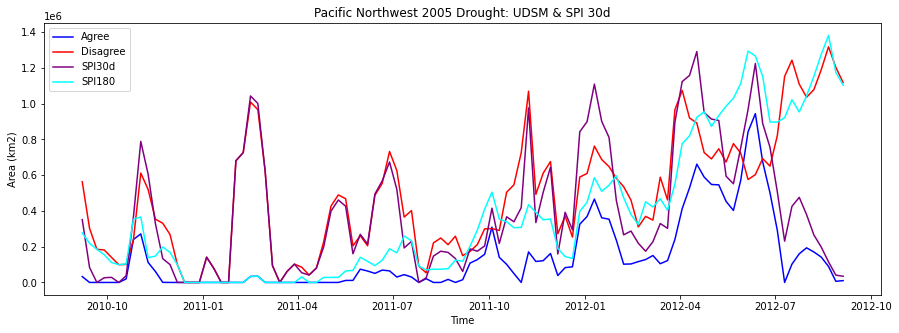

In [63]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(times_2011, (spi180_d1_2011_array[:-1]+spi30_d1_2011_array == 2).sum(axis=(1,2))*area_scalar, color='blue', label='Agree')
ax.plot(times_2011, (spi180_d1_2011_array[:-1]+spi30_d1_2011_array == 1).sum(axis=(1,2))*area_scalar, color='r', label='Disagree')
ax.plot(times_2011, spi30_d1_2011_array.sum(axis=(1,2))*area_scalar, color='purple', label='SPI30d')
ax.plot(times_2011, spi180_d1_2011_array[:-1].sum(axis=(1,2))*area_scalar, color='cyan', label='SPI180')

ax.set_ylabel('Area (km2)')
ax.set_xlabel('Time')
ax.set_title('Pacific Northwest 2005 Drought: UDSM & SPI 30d')
ax.legend()
fig.set_facecolor('w')